In [1]:
import time
import pickle

In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..')) 
sys.path.insert(0, module_path)

In [3]:
from hex_plot import plot_problem
from hex_star import PathfindingProblem, f, time_to_goal, best_first_search

In [4]:
maps_dir = "maps"

In [5]:
def save_layout(layout, filename):
    with open(filename, 'wb') as file:
        pickle.dump(layout, file)

def load_layout(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

In [6]:
def solve(filename):
    hex_layout = load_layout(filename)
    state_tuple = (
        hex_layout['agent'],
        hex_layout['velocity']
    )
    
    params = {
        'hex_map': hex_layout['hex_map'],
        'obstacle_map': hex_layout['obstacle_map'],
        'goal_loc': hex_layout['goal'],
        'hex_radius': hex_layout['hex_radius'],
        'hex_size': hex_layout['hex_size'],
        'acceleration_max': 5,
        'deceleration_max': 5,
        'lat_acceleration_max': 2
    }
    h = time_to_goal
    problem = PathfindingProblem(state_tuple, **params)
    solution = best_first_search(problem, f, h)
    return problem, solution
    

Processing map file: r3h0.33.pkl

Solution depth 11 found in 0.004462480545043945 seconds
Explored 545 states.
Processing map file: r15h1.00.pkl

Solution depth 45 found in 3.3748114109039307 seconds
Explored 326100 states.
Processing map file: r30h5.00.pkl

Solution depth 71 found in 70.23150730133057 seconds
Explored 4880562 states.
Processing map file: r40h5.00.pkl

Solution depth 97 found in 167.6069905757904 seconds
Explored 11070796 states.
Processing map file: r50h5.00.pkl

Solution depth 144 found in 694.7999947071075 seconds
Explored 31051397 states.


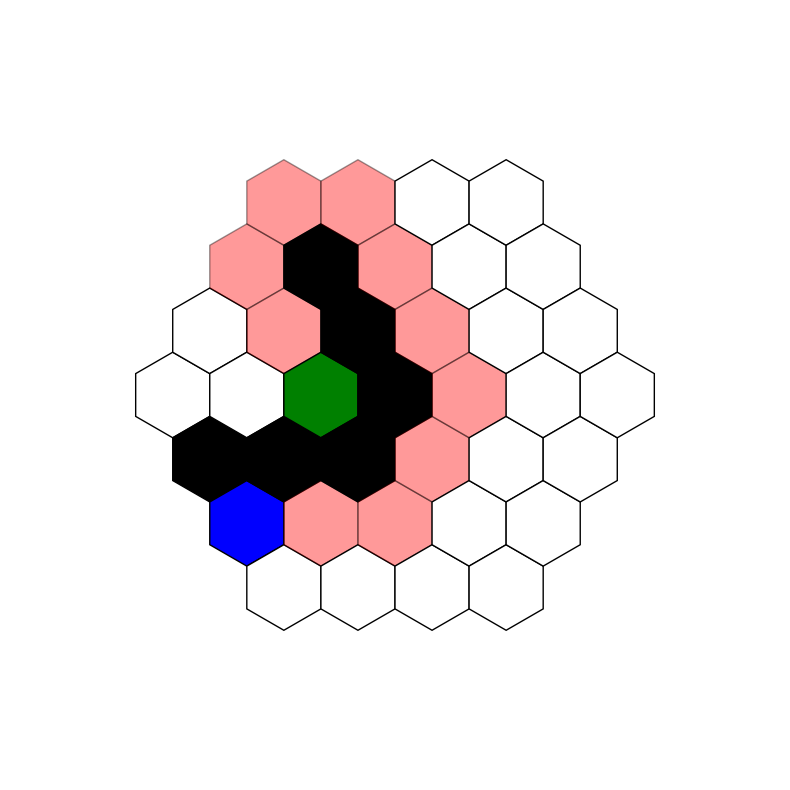

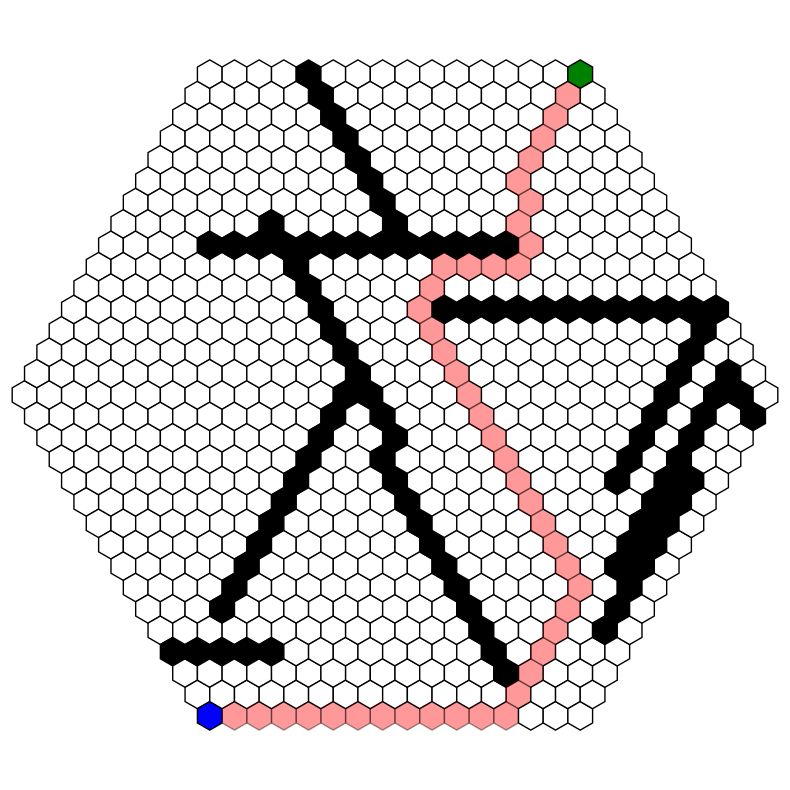

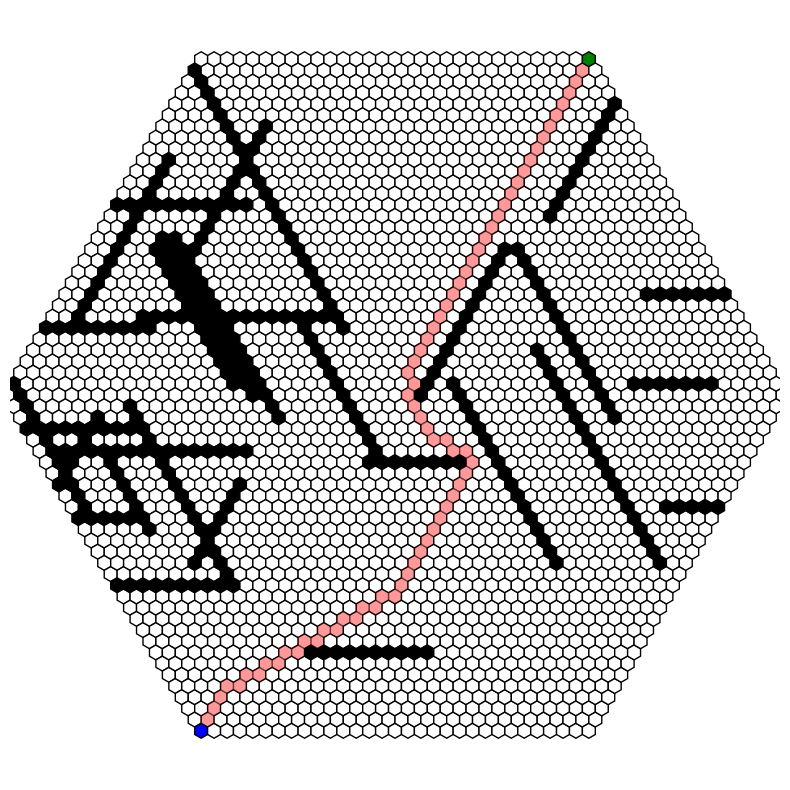

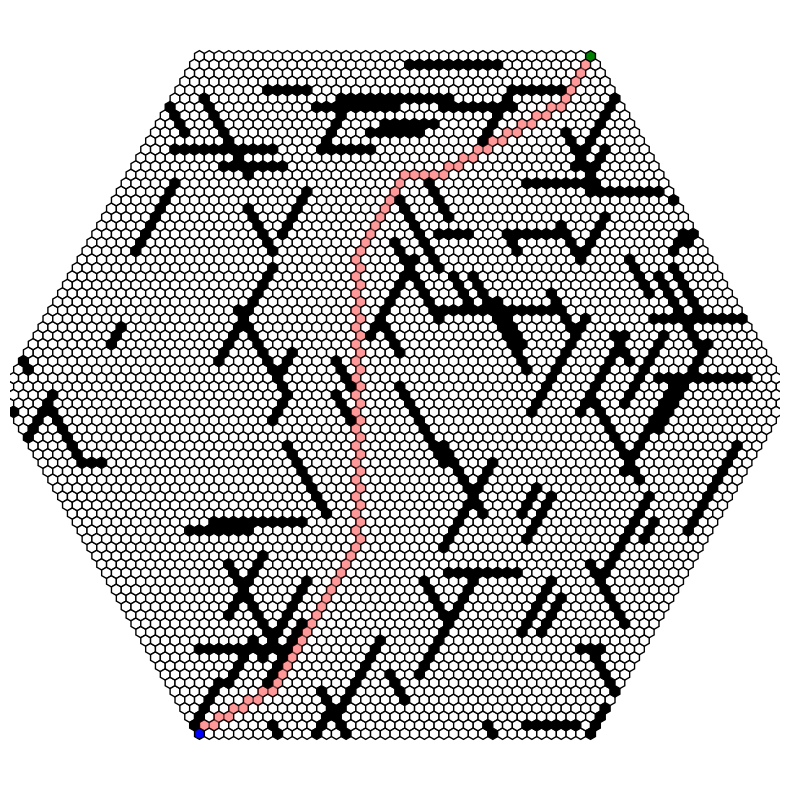

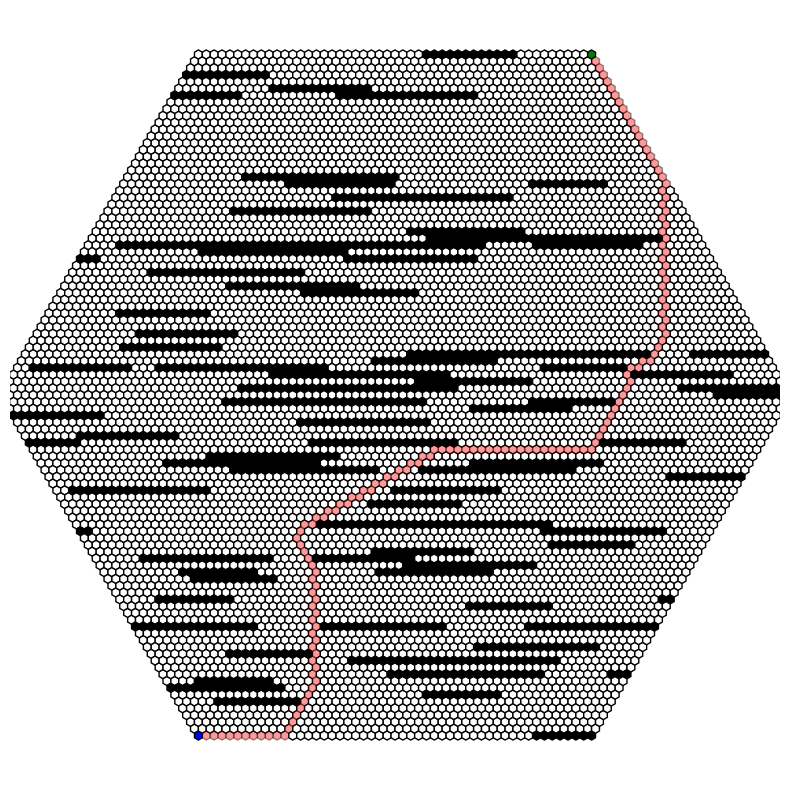

In [7]:
# Dictionaries to store the data
states_data = {}
nodes_data = {}
branching_data = {}
depths_data = {}
problems = {}
solutions = {}

# Heuristic functions to use
#heuristics = [zero_heuristic, box_goal_euclidian_distance, box_goal_manhattan_distance]

maps = [
    'r3h0.33.pkl',
    'r15h1.00.pkl',
    'r30h5.00.pkl',
    'r40h5.00.pkl',
    'r50h5.00.pkl'
]

for m in maps:
    print(f"Processing map file: {m}\n")
    states_expanded = []
    nodes_generated = []
    eff_branching_factors = []
    depths = []
    
        

    # Start the timer
    start = time.time()

    # Execute the search
    problem, solution = solve(maps_dir +"/"+ m)

    # Stop the timer
    end = time.time()

    # If a solution was found
    if solution is not None:
        consistent, states, nodes = problem.get_benchmarks()
        solution_cost = solution.path_cost
        states_expanded.append(states)
        nodes_generated.append(nodes)
        depths.append(solution_cost)

        current_node = solution
        solution_path = []
        while current_node.parent is not None:
            # print(current_node.state)
            # print(current_node.path_cost)
            loc, v = current_node.state
            cost = current_node.path_cost
            solution_path.append(loc)
            #velocities.append(v)
            #path_costs.append(cost)
            current_node = current_node.parent
            
        
        solution_path = list(reversed(solution_path))
        #velocities = list(reversed(velocities))
        #path_costs = list(reversed(path_costs))
        eff_branch_factor = pow(nodes, 1/len(solution_path))
        eff_branching_factors.append(eff_branch_factor)
        plot_problem(problem, solution_path)
    else:
        solution_cost = None
        eff_branch_factor = None
    print(f"Solution depth {len(solution_path)} found in {end-start} seconds\nExplored {nodes} states.")
    if not consistent:
        print(f"Test case {m} has shown the heuristic is not consistent")
    states_data[m] = states_expanded
    nodes_data[m] = nodes_generated
    branching_data[m] = eff_branching_factors
    depths_data[m] = depths
    problems[m] = problem
    solutions[m] = solution

In [8]:
states_data

{'r3h0.33.pkl': [343],
 'r15h1.00.pkl': [175535],
 'r30h5.00.pkl': [2531825],
 'r40h5.00.pkl': [5737893],
 'r50h5.00.pkl': [16558380]}

In [9]:
nodes_data

{'r3h0.33.pkl': [545],
 'r15h1.00.pkl': [326100],
 'r30h5.00.pkl': [4880562],
 'r40h5.00.pkl': [11070796],
 'r50h5.00.pkl': [31051397]}

In [10]:
branching_data

{'r3h0.33.pkl': [1.7732228473273537],
 'r15h1.00.pkl': [1.3259248395119552],
 'r30h5.00.pkl': [1.2422351119611292],
 'r40h5.00.pkl': [1.1820079580149847],
 'r50h5.00.pkl': [1.1272710174538587]}

In [11]:
depths_data

{'r3h0.33.pkl': [3.930622360187291],
 'r15h1.00.pkl': [18.34725792726875],
 'r30h5.00.pkl': [52.962110548464906],
 'r40h5.00.pkl': [60.31487244448354],
 'r50h5.00.pkl': [98.40844795264216]}